<a href="https://colab.research.google.com/github/konan-91/OcularClassification/blob/master/notebooks/1_data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#WORK IN PROGRESS! Please check back later.

#Generating Topoplots from Blinks

Our first step is to transform the dataset of ocular & non-ocular EEG data into spectograms (image files) that we can use to train the model.

In [1]:
!pip install mne -q
!pip install pymatreader -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 48.0 MB/s eta 0:00:00


In [2]:
import mne
import pymatreader
import matplotlib.pyplot as plt
import numpy as np
import os

##Loading the data

Note: if you are running this notebook yourself, please ensure the zipped osf dataset is present at the root of your working directory. In Colab, this is /content.

In [3]:
!unzip -q /content/osfstorage-archive.zip
!rm /content/osfstorage-archive.zip

In [4]:
def load_data(folderpath, data):
    for filename in os.listdir(folderpath):
        if filename.endswith(".set"):
            filepath = os.path.join(folderpath, filename)
            epochs = mne.read_epochs_eeglab(filepath) # The dataset we use comes pre-epoched
            data.append(epochs)

In [5]:
#mne.set_log_level('ERROR')
path = "/content/osfstorage-archive"
participantsData = [] # List of participants, who are objects containing (many) epochs

for study in os.listdir(path):
    study_path = os.path.join(path, study)
    if os.path.isdir(study_path):
        load_data(study_path, participantsData)

/usr/local/lib/python3.11/dist-packages/pymatreader/utils.py:168: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn(


Extracting parameters from /content/osfstorage-archive/study01/study01_p01_prep.set...
Not setting metadata
52 matching events found


<ipython-input-4-7b3f0ba0b9fd>:5: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(filepath) # The dataset we use comes pre-epoched
<ipython-input-4-7b3f0ba0b9fd>:5: RuntimeWarning: Unknown types found, setting as type EEG:
artifact: ['eye-art', 'eye-blink', 'eye-d', 'eye-fix', 'eye-l', 'eye-r', 'eye-u']
eoglpf: ['HEOG_lpf', 'REOG_lpf', 'VEOG_lpf']
label: ['artifactclasses']
paradigm: ['block']
snap: ['target_S', 'target_X', 'target_Z']
state: ['label']
  epochs = mne.read_epochs_eeglab(filepath) # The dataset we use comes pre-epoched
<ipython-input-4-7b3f0ba0b9fd>:5: RuntimeWarning: Data file name in EEG.data (ebs_prep.fdt) is incorrect, the file name must have changed on disk, using the correct file name (study01_p01_prep.fdt).
  epochs = mne.read_epochs_eeglab(filepath) # The dataset we use comes pre-epoched


No baseline correction applied
0 projection items activated
Ready.


<ipython-input-4-7b3f0ba0b9fd>:5: RuntimeWarning: Not setting positions of 3 eog channels found in montage:
['HEOG', 'VEOG', 'REOG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  epochs = mne.read_epochs_eeglab(filepath) # The dataset we use comes pre-epoched
/usr/local/lib/python3.11/dist-packages/pymatreader/utils.py:168: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn(


Extracting parameters from /content/osfstorage-archive/study01/study01_p02_prep.set...
Not setting metadata
51 matching events found


<ipython-input-4-7b3f0ba0b9fd>:5: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(filepath) # The dataset we use comes pre-epoched
<ipython-input-4-7b3f0ba0b9fd>:5: RuntimeWarning: Unknown types found, setting as type EEG:
artifact: ['eye-art', 'eye-blink', 'eye-d', 'eye-fix', 'eye-l', 'eye-r', 'eye-u']
eoglpf: ['HEOG_lpf', 'REOG_lpf', 'VEOG_lpf']
label: ['artifactclasses']
paradigm: ['block']
snap: ['target_S', 'target_X', 'target_Z']
state: ['label']
  epochs = mne.read_epochs_eeglab(filepath) # The dataset we use comes pre-epoched
<ipython-input-4-7b3f0ba0b9fd>:5: RuntimeWarning: Data file name in EEG.data (ebs_prep.fdt) is incorrect, the file name must have changed on disk, using the correct file name (study01_p02_prep.fdt).
  epochs = mne.read_epochs_eeglab(filepath) # The dataset we use comes pre-epoched


No baseline correction applied
0 projection items activated
Ready.


<ipython-input-4-7b3f0ba0b9fd>:5: RuntimeWarning: Not setting positions of 3 eog channels found in montage:
['HEOG', 'VEOG', 'REOG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  epochs = mne.read_epochs_eeglab(filepath) # The dataset we use comes pre-epoched
/usr/local/lib/python3.11/dist-packages/pymatreader/utils.py:168: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn(


Extracting parameters from /content/osfstorage-archive/study01/study01_p05_prep.set...
Not setting metadata
52 matching events found
No baseline correction applied
0 projection items activated
Ready.


<ipython-input-4-7b3f0ba0b9fd>:5: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(filepath) # The dataset we use comes pre-epoched
<ipython-input-4-7b3f0ba0b9fd>:5: RuntimeWarning: Unknown types found, setting as type EEG:
artifact: ['eye-art', 'eye-blink', 'eye-d', 'eye-fix', 'eye-l', 'eye-r', 'eye-u']
eoglpf: ['HEOG_lpf', 'REOG_lpf', 'VEOG_lpf']
label: ['artifactclasses']
paradigm: ['block']
snap: ['target_S', 'target_X', 'target_Z']
state: ['label']
  epochs = mne.read_epochs_eeglab(filepath) # The dataset we use comes pre-epoched
<ipython-input-4-7b3f0ba0b9fd>:5: RuntimeWarning: Data file name in EEG.data (ebs_prep.fdt) is incorrect, the file name must have changed on disk, using the correct file name (study01_p05_prep.fdt).
  epochs = mne.read_epochs_eeglab(filepath) # The dataset we use comes pre-epoched
<ipython-input-4-7b3f0ba0b9fd>:5: RuntimeWarning: Not setting positions of 3 eog c

Extracting parameters from /content/osfstorage-archive/study01/study01_p03_prep.set...
Not setting metadata
51 matching events found
No baseline correction applied
0 projection items activated
Ready.


<ipython-input-4-7b3f0ba0b9fd>:5: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(filepath) # The dataset we use comes pre-epoched
<ipython-input-4-7b3f0ba0b9fd>:5: RuntimeWarning: Unknown types found, setting as type EEG:
artifact: ['eye-art', 'eye-blink', 'eye-d', 'eye-fix', 'eye-l', 'eye-r', 'eye-u']
eoglpf: ['HEOG_lpf', 'REOG_lpf', 'VEOG_lpf']
label: ['artifactclasses']
paradigm: ['block']
snap: ['target_S', 'target_X', 'target_Z']
state: ['label']
  epochs = mne.read_epochs_eeglab(filepath) # The dataset we use comes pre-epoched
<ipython-input-4-7b3f0ba0b9fd>:5: RuntimeWarning: Data file name in EEG.data (ebs_prep.fdt) is incorrect, the file name must have changed on disk, using the correct file name (study01_p03_prep.fdt).
  epochs = mne.read_epochs_eeglab(filepath) # The dataset we use comes pre-epoched
<ipython-input-4-7b3f0ba0b9fd>:5: RuntimeWarning: Not setting positions of 3 eog c

Extracting parameters from /content/osfstorage-archive/study01/study01_p04_prep.set...
Not setting metadata
47 matching events found
No baseline correction applied
0 projection items activated
Ready.


<ipython-input-4-7b3f0ba0b9fd>:5: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(filepath) # The dataset we use comes pre-epoched
<ipython-input-4-7b3f0ba0b9fd>:5: RuntimeWarning: Unknown types found, setting as type EEG:
artifact: ['eye-art', 'eye-blink', 'eye-d', 'eye-fix', 'eye-l', 'eye-r', 'eye-u']
eoglpf: ['HEOG_lpf', 'REOG_lpf', 'VEOG_lpf']
label: ['artifactclasses']
paradigm: ['block']
snap: ['target_S', 'target_X', 'target_Z']
state: ['label']
  epochs = mne.read_epochs_eeglab(filepath) # The dataset we use comes pre-epoched
<ipython-input-4-7b3f0ba0b9fd>:5: RuntimeWarning: Data file name in EEG.data (ebs_prep.fdt) is incorrect, the file name must have changed on disk, using the correct file name (study01_p04_prep.fdt).
  epochs = mne.read_epochs_eeglab(filepath) # The dataset we use comes pre-epoched
<ipython-input-4-7b3f0ba0b9fd>:5: RuntimeWarning: Not setting positions of 3 eog c

###Understanding the Dataset

Participants were asked to rest, blink, and make horizontal and vertical eye movements. As such, the dataset contains labelled and timestamped data of when each event occured. Labelled data is ideal for training classification models, as we can teach it to accurately disciminate between each event.

The OSF training dataset is split into 5 studies. Each study contains EEGLAB objects which represent each participant in the study. Each object is a collection of epochs, containing rest events, blinks, or saccades. Each epoch may contain anywhere from 6-20 events of *only* one of the prior listed event types. In order to maximise the amount of training data, we need to split the data so that each individual event has it's own epoch (ex. each blink is its own epoch, rather than an epoch containing 6+ blinks).

In [6]:
blinks_data = [participant['4'] for participant in participantsData]
blinkTriggerData = [participant.get_data(picks='eye-blink') for participant in blinks_data]

Below is a graph of an blink epoch containing 7 individual blinks, alongside a graph of the trigger channel. Data will be re-epoched at the start of each trigger, ending at the beginning of the next (or when the epoch ends).

<EpochsEEGLAB | 1 events (all good), 0 – 7.995 s (baseline off), ~1.1 MiB, data loaded,
 '4/blink/blink/blink/blink/blink/blink': 1>
Using matplotlib as 2D backend.


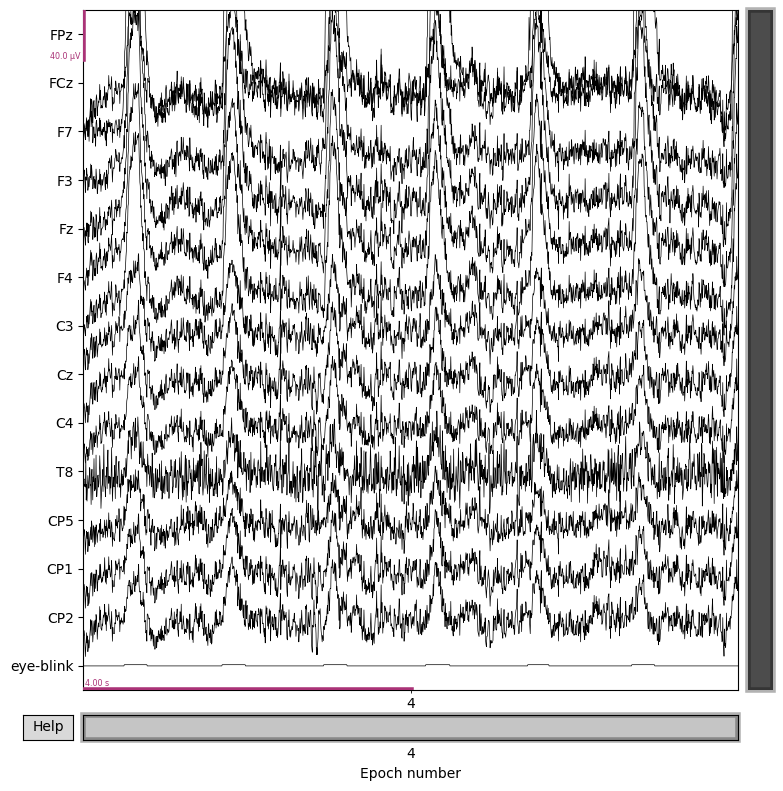

In [7]:
print(blinks_data[0][0])
blinks_data[0][0].plot(picks=['eye-blink', 'C3', 'C4', 'FPz', 'FCz', 'F7', 'F3', 'Fz', 'F4', 'Cz', 'C4', 'T8', 'CP5', 'CP1', 'CP2']);

Function which takes a list of epochs, and divides each epoch based on a trigger channel. (Although it assumes we're using a MNE object, not EEGLabs). Also making folder for all the converted things to go in.

In [23]:
print(type(blinks_data))
print(type(blinks_data[0]))

os.makedirs("converted_epochs", exist_ok=True)

<class 'list'>
<class 'mne.io.eeglab.eeglab.EpochsEEGLAB'>


In [28]:
def eeglabs_to_mne(eeglabs_epochs):
    epoch_no = 0

    for epoch in eeglabs_epochs:
        # Initialize event dictionary and event list
        event_dict = {}
        event_list = []

        # Extract unique event names from EEGLAB
        for i, event_desc in enumerate(epoch.events[:, -1]):
            # Convert event label to a string (ensure compatibility)
            event_label = str(epoch.event_id.get(event_desc, event_desc))

            # Assign a unique integer ID if not already assigned
            if event_label not in event_dict:
                event_dict[event_label] = len(event_dict) + 1  # Ensure event_id values are integers

            event_list.append([epoch.events[i, 0], 0, event_dict[event_label]])

        # Convert to numpy array
        event_array = np.array(event_list, dtype=int)  # Ensure integer type for MNE compatibility

        # Update the EEGLAB epochs object with new events and event_id
        epoch.events = event_array
        epoch.event_id = event_dict  # Ensure keys are strings and values are integers

        # Save the converted epochs
        save_path = os.path.join("converted_epochs", f"{epoch_no}-epo.fif")
        epoch.save(save_path, overwrite=True)
        epoch_no += 1

In [29]:
eeglabs_to_mne(blinks_data)

Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.


Reading /content/converted_epochs/3-epo.fif ...
    Found the data of interest:
        t =       0.00 ...    7995.00 ms
        0 CTF compensation matrices available
Not setting metadata
11 matching events found
No baseline correction applied
0 projection items activated
Reading /content/converted_epochs/2-epo.fif ...
    Found the data of interest:
        t =       0.00 ...    7995.00 ms
        0 CTF compensation matrices available
Not setting metadata
11 matching events found
No baseline correction applied
0 projection items activated
Reading /content/converted_epochs/4-epo.fif ...
    Found the data of interest:
        t =       0.00 ...    7995.00 ms
        0 CTF compensation matrices available
Not setting metadata
9 matching events found
No baseline correction applied
0 projection items activated
Reading /content/converted_epochs/0-epo.fif ...
    Found the data of interest:
        t =       0.00 ...    7995.00 ms
        0 CTF compensation matrices available
Not setting met

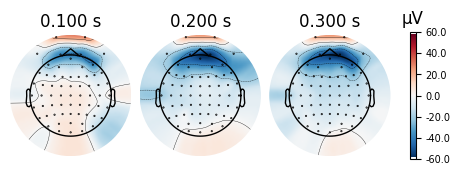

In [35]:
converted_epochs = []
for filename in os.listdir("converted_epochs"):
    if filename.endswith(".fif"):
        filepath = os.path.join("converted_epochs", filename)
        converted_epochs.append(mne.read_epochs(filepath))

# Define non-EEG channels to exclude
exclude_channels = [
    "target_X", "target_Z", "target_S", "HEOG_lpf", "VEOG_lpf", "REOG_lpf",
    "block", "eye-l", "eye-r", "eye-d", "eye-u", "eye-blink", "eye-fix",
    "eye-art", "label", "artifactclasses"
]

# Drop the unwanted channels
for epoch in converted_epochs:
    epoch.drop_channels(exclude_channels)

# Compute the evoked response (ERP)
evoked = converted_epochs[0][0].average()

# Plot topographic maps at specific time points
evoked.plot_topomap(times=[0.1, 0.2, 0.3], ch_type="eeg");

In [38]:
print(len(converted_epochs))
print(type(converted_epochs[0]))

5
<class 'mne.epochs.EpochsFIF'>


Next: Use MNE object and re-epoch it based on the trigger channel!

Notes:

Image maps may work as an alternative to Topoplots.

https://mne.tools/1.8/generated/mne.find_events.html